# Histogram Equalization, Specification
### 지정된 곳은 없고 Example과 Tutorial 9-1, 2에 해당하는 부분이다
### 9장부터 난이도가 확 올라가므로 집중해서 개념들을 파악해야 한다

#### plt.histogram 함수를 사용하면 imhist 외에 bins를 얻어올 수 있다.
#### bins는 Histogram의 x축, imhist는 y축(Normalized된 값)이라고 생각하면 된다
#### bins가 size가 1 길어서 마지막 제외해준다

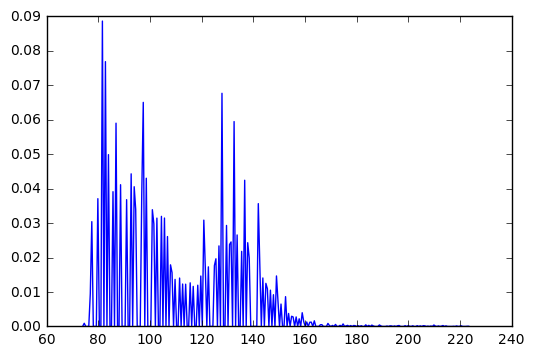

In [22]:
from PIL import Image
import pylab as plt
import numpy as np

img = np.array(Image.open('D:\\ipy\\pout.tif').convert('L'))

imhist, bins = plt.histogram(img.flatten(), 256, normed=True)
plt.plot(bins[:-1],imhist)
plt.show()

#### Histogram Eq. 를 하기 위해선 CDF를 구해야 하는데 cumsum() 함수를 쓰면 쉽게 할 수 있다.
#### 하지만 0-255로 Normalize를 해주어야 한다
#### 그리고 interp함수로 Mapping을 해주게 되는데 (기존 Pixel에서 Equalized된 Pixel로)
#### Qy = interp(Qx, x, y) 처럼 x와 y를 알려주었을 때, Qx지점에서의 Qy값을 추측해서 뽑아내는 것이다

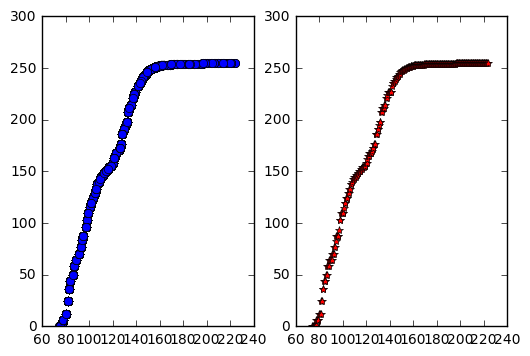

In [23]:
cdf = imhist.cumsum()
cdf = 255 * cdf / cdf[-1]

im2 = np.interp(img.flatten(), bins[:-1], cdf)

plt.figure(1)
plt.subplot(1,2,1)
plt.plot(img.flatten(),im2,'o')
plt.subplot(1,2,2)
plt.plot(bins[:-1],cdf,'r*')
plt.show()

#### reshape를 사용해서 img의 모양처럼 만들어준다 (현재는 1-D Vector이므로)

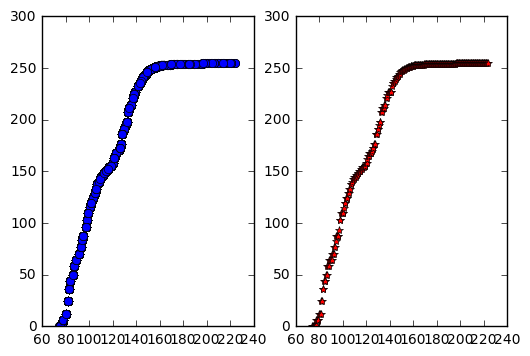

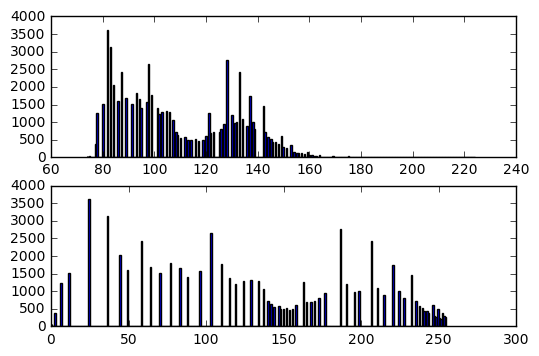

In [2]:
img_heq = im2.reshape(img.shape)

plt.figure(2)
plt.subplot(2,1,1)
plt.hist(img.flatten(),256)

plt.subplot(2,1,2)
plt.hist(img_heq.flatten(),256)
plt.show()

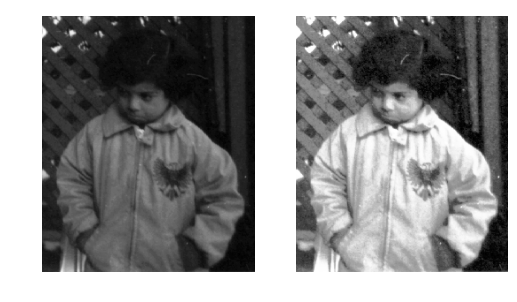

In [3]:
plt.figure(1)
plt.subplot(1,2,1)
plt.gray()
plt.axis('off')
plt.imshow(img)

plt.subplot(1,2,2)
plt.gray()
plt.axis('off')
plt.imshow(img_heq)

plt.show()

#### 다음은 Histogram Specification이다
#### Desired Histogram(원하는 히스토그램)은 아래와 같이 점점 밝아질수록 증가하도록 설정해 보자

In [10]:
desired = np.arange(0,256,1)
print(desired)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

#### Histogram Matching 방법은 책에 나와있듯이
#### 변환하려는 Image의 Histogram의 CDF와
#### 원하는 Histogram의 CDF를 구해 놓고
#### 변환하려는 픽셀을 CDF를 거친 값을 구하고 (Histogram Equalization 과정과 같다)
#### 그 변환된 픽셀을 원하는 Histogram의 CDF에 역-변환 (input을 Y에 넣었을때 X값)
#### 하여 정해진 픽셀값으로 바꾸면 된다
### 아래는 그 과정으로, interp함수를 유심히 보도록 하자

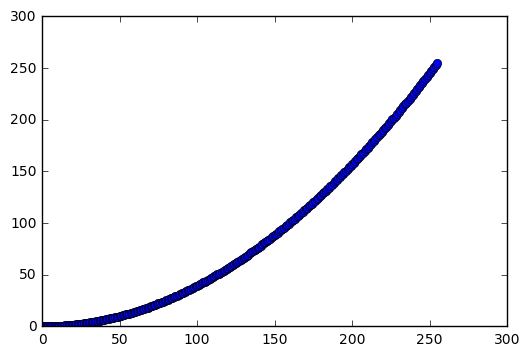

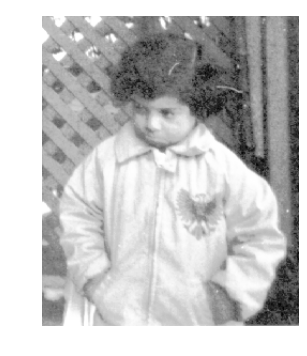

In [11]:
cdf_d = desired.cumsum()
cdf_d = 255 * cdf_d / cdf_d[-1]

plt.figure(1)
plt.plot(np.arange(0,256,1),cdf_d,'o')
plt.show()

im3 = np.interp(im2, cdf_d, np.arange(0,256,1))

img_hmc = im3.reshape(img.shape)

plt.figure(2)
plt.gray()
plt.axis('off')
plt.imshow(img_hmc)
plt.show()

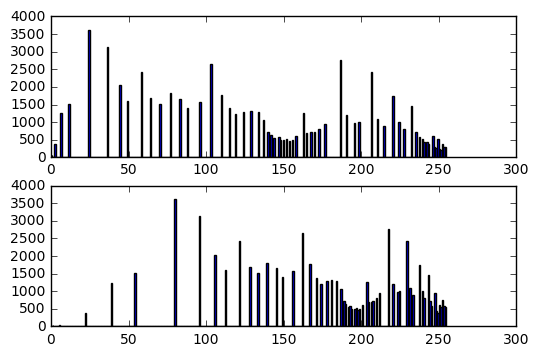

In [12]:
plt.figure(2)
plt.subplot(2,1,1)
plt.hist(img_heq.flatten(),256)

plt.subplot(2,1,2)
plt.hist(img_hmc.flatten(),256)
plt.show()